In [1]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import griddata

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def spin_indtoval(s):
    if s == 0:
        return "+2"
    else:
        return "-2"
    
%load_ext autoreload
%autoreload 2


def check_parity(Xgeos, Xgshes, betas):
    for i in range(Xgeos.shape[0]):
        for n in range(2):
            for s in range(2):
                signs = np.sign(Xgshes[i, n, s, :, 2] - Xgeos[i, n, 2])
                if not np.alltrue(signs[0] == signs[1:]):
                    print("Inconsistent sign: i = {}, n = {}, s = {}, logbeta = {:.3f}"
                          .format(i, n, s, np.log10(betas[i, n, s, 1])))
                if signs[0] != np.sign(Xgeos[i, n, 8]):
                    print("Inconsistent parity: i = {}, n = {}, s = {}, logbeta = {:.3f}, mu = {:.3f}"
                          .format(i, n, s, np.log10(betas[i, n, s, 1]), Xgeos[i, n, 8]))

# Dependence on $\theta_{\rm obs}$

In [3]:
runID = "01"


Xgeos = np.load("../results/run_{}/Xgeos.npy".format(runID))
Xgshes = np.load("../results/run_{}/Xgshes.npy".format(runID))
epsilons = np.load("../results/run_{}/Epsilons.npy".format(runID))
alphas = np.load("../results/run_{}/alphas.npy".format(runID))
betas = np.load("../results/run_{}/betas.npy".format(runID))
thetaobs = np.load("../results/run_{}/VaryParam.npy".format(runID))

dmerger = np.abs(Xgeos[:, 0, 2] - Xgeos[:, 1, 2])

check_parity(Xgeos, Xgshes, betas)

<IPython.core.display.Javascript object>


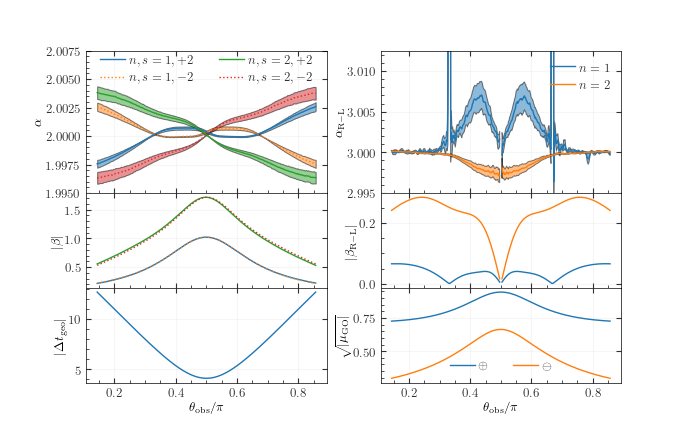

In [6]:
GSHEWaveform.setmplstyle("../plot_style.txt")
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(3.45*2, 3.45*1.25), sharex='col', gridspec_kw={'height_ratios': [1.5, 1, 1]})
fig.subplots_adjust(hspace=0, wspace=0.225)

# GSHE to geodesic delay
for n in range(2):
    for s in range(2):
        for k, par in enumerate([alphas, betas]):
            mu = par[:, n, s, 0]
            std = par[:, n, s, 1]
            lower = mu - std
            upper = mu + std
            
            if k == 0:
                label = r"$n, s = {},{}$".format(n+1, polardict[s])
            else:
                label = None

            axes[k, 0].plot(thetaobs/np.pi, mu, label=label, ls=polarls[s])
            if k == 0:
                axes[k, 0].fill_between(thetaobs/np.pi, mu - std, mu + std, alpha=0.5)


# GSHE to GSHE delay
for n in range(2):
    for k, par in enumerate([alphas, betas]):
        mu = par[:, n, 2, 0]
        std = par[:, n, 2, 1]
        
        mu = savgol_filter(mu, 3, 1)
        std = savgol_filter(std, 3, 1)

        if k == 0:
            label = r"$n = {}$".format(n+1)
        else:
            label = None

        axes[k, 1].plot(thetaobs/np.pi, mu, label=label)
        if k == 0:
            axes[k, 1].fill_between(thetaobs/np.pi, mu - std, mu + std, alpha=0.5)

for i in range(3):
    for j in range(2):
        axes[i, j].grid(alpha=0.1)

            
axes[2, 0].plot(thetaobs/np.pi, dmerger)
for i in range(2):
    mu = Xgeos[:, i, 8]
    if mu[0] > 0:
        label = r"$\oplus$"
    else:
        label = r"$\ominus$"
    axes[2, 1].plot(thetaobs/np.pi, np.abs(mu)**0.5, c=colors[i], label=label)
    

axes[2, 0].set_ylabel(r"$|\Delta t_{\rm geo}|$")
axes[2, 1].set_ylabel(r"$\sqrt{|\mu_{\rm GO}|}$")

                
for i in range(2):
    axes[2, i].set_xlabel(r"$\theta_{\rm obs} / \pi$")
    
axes[0, 0].set_ylabel(r"$\alpha$")
axes[1, 0].set_ylabel(r"$|\beta|$")
axes[0, 1].set_ylabel(r"$\alpha_{\rm R-L}$")
axes[1, 1].set_ylabel(r"$|\beta_{\rm R-L}|$")
    
# axes[0, 0].set_title("GSHE to geodesic delay")
# axes[0, 1].set_title("GSHE to GSHE delay")
axes[0, 0].set_ylim(1.995, 2.0075)
axes[0, 1].set_ylim(2.995, 3.0125)
axes[0, 0].legend(ncol=2, loc=9, bbox_to_anchor=(0.5, 1.05))
axes[0, 1].legend(ncol=1, loc="best")
axes[2, 1].legend(ncol=2, loc="best")

fig.savefig("/Users/richard/Downloads/powerlaw_thetaobs.pdf", dpi=400, bbox_inches="tight") 
fig.show()


# plt.figure()
# for i in range(2):
#     for s in range(2):
#         plt.plot(thetaobs/np.pi, Xgshes[:, i, s,-1, 8] / Xgeos[:, i, 8],
#                  label=r"$n, s = {}, {}$".format(i+1, polardict[s]))
# plt.xlabel(r"$\theta_{\rm obs} / \pi$")
# plt.ylabel(r"$\mu(\epsilon=0.1, s) / \mu_{\rm GO}$")
# plt.legend()
# plt.show()

# Dependence on $r_{\rm src}$

In [38]:
runID = "02"


Xgeos = np.load("../data/run_{}/Xgeos.npy".format(runID))
Xgshes = np.load("../data/run_{}/Xgshes.npy".format(runID))
epsilons = np.load("../data/run_{}/Epsilons.npy".format(runID))
alphas = np.load("../data/run_{}/alphas.npy".format(runID))
betas = np.load("../data/run_{}/betas.npy".format(runID))
rsrc = np.load("../data/run_{}/VaryParam.npy".format(runID)) / 2

dmerger = np.abs(Xgeos[:, 0, 2] - Xgeos[:, 1, 2])

<IPython.core.display.Javascript object>


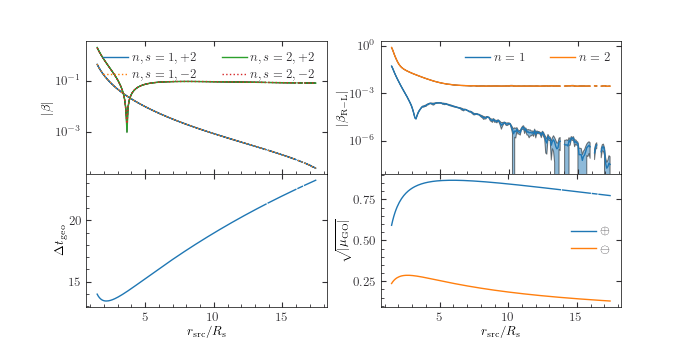

In [39]:
GSHEWaveform.setmplstyle("../plot_style.txt")
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(3.45*2, 3.45*1.0))
fig.subplots_adjust(hspace=0, wspace=0.225)


# Geodesic to GSHE
for n in range(2):
    for s in range(2):
        mu = betas[:, n, s, 0]
        std = betas[:, n, s, 1]
            
        label = r"$n, s = {},{}$".format(n + 1, polardict[s])
        axes[0, 0].plot(rsrc, mu, label=label, ls=polarls[s])
        axes[0, 0].fill_between(rsrc, mu - std, mu + std, alpha=0.5)


# GSHE to GSHE
for n in range(2):
    mu = betas[:, n, 2, 0]
    std = betas[:, n, 2, 1]
    
    mu = savgol_filter(mu, 3, 1)
    std = savgol_filter(std, 3, 1)
        
    label = r"$n = {}$".format(n+1)

    axes[0, 1].plot(rsrc, mu, label=label)
    axes[0, 1].fill_between(rsrc,mu - std, mu+std, alpha=0.5)
    
    
    
    
axes[1, 0].plot(rsrc, dmerger)
for i in range(2):
    if Xgeos[0, i, 8] < 0:
        m = Xgeos[:, i, 8] < 0
    else:
        m = np.ones_like(rsrc, dtype=bool)
    
    mu = Xgeos[m, i, 8]
    if mu[0] > 0:
        label = r"$\oplus$"
    else:
        label = r"$\ominus$"
    axes[1, 1].plot(rsrc[m], np.abs(mu)**0.5, c=colors[i], label=label)
    

        
for i in range(2):
    axes[1, i].set_xlabel(r"$r_{\rm src} / R_{\rm s}$")
    axes[0, i].set_yscale("log")
    
    
axes[0, 0].legend(ncol=2,loc="upper right")
axes[0, 1].legend(ncol=2)
axes[0, 0].set_ylabel(r"$|\beta|$")
axes[0, 1].set_ylabel(r"$|\beta_{\rm R-L}|$")
axes[1, 0].set_ylabel(r"$\Delta t_{\rm geo}$")
axes[1, 1].set_ylabel(r"$\sqrt{|\mu_{\rm GO}|}$")
# axes[1, 1].set_yscale("log")
axes[1, 1].legend(ncol=1)

fig.savefig("/Users/richard/Downloads/radial_powerlaw_fit.pdf", dpi=400, bbox_inches="tight") 
fig.show()


# plt.figure()
# for i in range(2):
#     for s in range(2):
#         plt.plot(rsrc, Xgshes[:, i, s,-1, 8] / Xgeos[:, i, 8],
#                  label=r"$n, s = {}, {}$".format(i+1, polardict[s]))
# plt.xlabel(r"$r_{\rm src} / R_{\rm s}$")
# plt.ylabel(r"$\mu(\epsilon=0.1, s) / \mu_{\rm geo}$")
# plt.legend()
# plt.show()

[-0.04807239 -0.97038622]


<IPython.core.display.Javascript object>


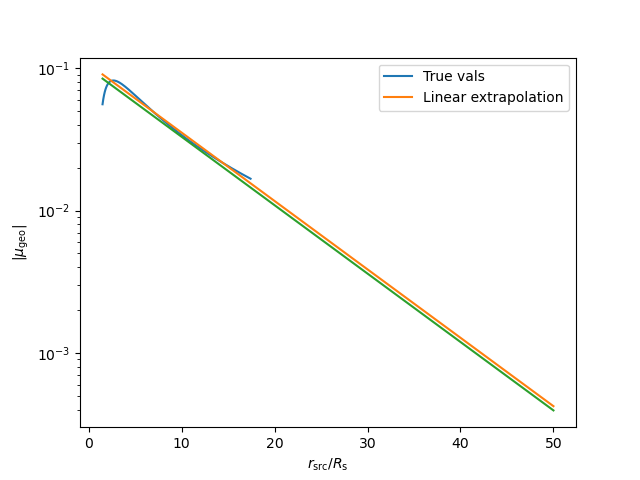

In [43]:
i = 1

m = Xgeos[:, i, 8] < 0

GSHEWaveform.setmplstyle()


mfit = m & (rsrc > 4)

fit = np.polyfit(rsrc[mfit], np.log10(np.abs(Xgeos[mfit, i, 8])), 1)
print(fit)
t = np.linspace(rsrc.min(), 50)


plt.figure()
plt.plot(rsrc[m], np.abs(Xgeos[m, i, 8]), label="True vals")

plt.plot(t, 10**np.polyval(fit, t), label="Linear extrapolation")

plt.plot(t, 0.1 *10**(-0.04807239 * t))

plt.yscale("log")



plt.ylabel(r"$|\mu_{\rm geo}|$")
plt.xlabel(r"$r_{\rm src} / R_{\rm s}$")
plt.legend()
plt.savefig("/Users/richard/Downloads/mu_extrapol.png", dpi=300)
plt.show()

[-0.18780711 -1.14949242]


<IPython.core.display.Javascript object>


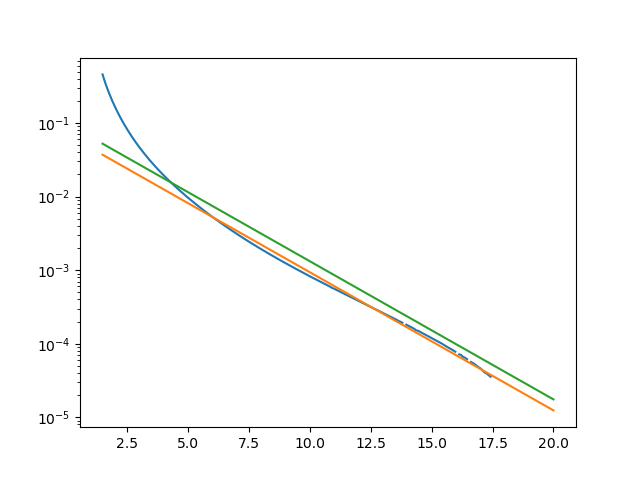

In [55]:
n = 0
y = betas[:, n, 0, 0]


m = np.isfinite(y) & (rsrc > 4)



fit = np.polyfit(rsrc[m], np.log10(y[m]), 1)

print(fit)


plt.figure()
plt.plot(rsrc, y)
t = np.linspace(rsrc.min(), 20)
plt.plot(t, 10**np.polyval(fit, t), label="Linear extrapolation")

plt.plot(t, 0.1 * 10**(-0.18780711 * t))
plt.yscale("log")
plt.show()



In [ ]:
i = 1

m = Xgeos[:, i, 8] < 0

GSHEWaveform.setmplstyle()


mfit = m & (rsrc > 4)

fit = np.polyfit(rsrc[mfit], np.log10(np.abs(Xgeos[mfit, i, 8])), 1)
print(fit)
t = np.linspace(rsrc.min(), 50)


plt.figure()
plt.plot(rsrc[m], np.abs(Xgeos[m, i, 8]), label="True vals")

plt.plot(t, 10**np.polyval(fit, t), label="Linear extrapolation")

plt.plot(t, 0.1 *10**(-0.04807239 * t))

plt.yscale("log")



plt.ylabel(r"$|\mu_{\rm geo}|$")
plt.xlabel(r"$r_{\rm src} / R_{\rm s}$")
plt.legend()
plt.savefig("/Users/richard/Downloads/mu_extrapol.png", dpi=300)
plt.show()

# Dependence on $\phi_{\rm obs}$

In [3]:
runID = "03"


Xgeos = np.load("../results/run_{}/Xgeos.npy".format(runID))
Xgshes = np.load("../results/run_{}/Xgshes.npy".format(runID))
epsilons = np.load("../results/run_{}/Epsilons.npy".format(runID))
alphas = np.load("../results/run_{}/alphas.npy".format(runID))
betas = np.load("../results/run_{}/betas.npy".format(runID))
phiobs = np.load("../results/run_{}/VaryParam.npy".format(runID))

dmerger = np.abs(Xgeos[:, 0, 2] - Xgeos[:, 1, 2])

# check_parity(Xgeos, Xgshes, betas)

<IPython.core.display.Javascript object>


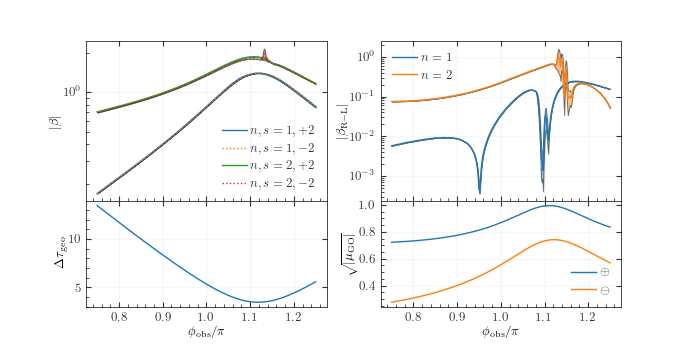

In [4]:
GSHEWaveform.setmplstyle("../plot_style.txt")
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(3.45*2, 3.45*1.0), gridspec_kw={'height_ratios': [1.5, 1]})
fig.subplots_adjust(hspace=0, wspace=0.225)


# Geodesic to GSHE
for n in range(2):
    for s in range(2):
        mu = betas[:, n, s, 0]
        std = betas[:, n, s, 1]
            
        label = r"$n, s = {},{}$".format(n + 1, polardict[s])
        axes[0, 0].plot(phiobs / np.pi, mu, label=label, ls=polarls[s])
        axes[0, 0].fill_between(phiobs / np.pi, mu - std, mu + std, alpha=0.5)


# GSHE to GSHE
for n in range(2):
    mu = betas[:, n, 2, 0]
    std = betas[:, n, 2, 1]
    
    mu = savgol_filter(mu, 3, 1)
    std = savgol_filter(std, 3, 1)
        
    label = r"$n = {}$".format(n+1)

    axes[0, 1].plot(phiobs / np.pi, mu, label=label)
    axes[0, 1].fill_between(phiobs / np.pi, mu - std, mu+std, alpha=0.5)
    
    
    
    
axes[1, 0].plot(phiobs/ np.pi, dmerger)
for i in range(2):
    mu = Xgeos[:, i, 8]
    if mu[0] > 0:
        label = r"$\oplus$"
    else:
        label = r"$\ominus$"
    axes[1, 1].plot(phiobs/ np.pi, np.abs(mu)**0.5, c=colors[i], label=label)
    
    for j in range(2):
        axes[i, j].grid(alpha=0.1)
    

        
for i in range(2):
    axes[1, i].set_xlabel(r"$\phi_{\rm obs} / \pi$")
    axes[0, i].set_yscale("log")
    axes[0, i].legend(ncol=1)
axes[0, 0].set_ylabel(r"$|\beta|$")
axes[0, 1].set_ylabel(r"$|\beta_{\rm R-L}|$")
axes[1, 0].set_ylabel(r"$\Delta \tau_{\rm geo}$")
axes[1, 1].set_ylabel(r"$\sqrt{|\mu_{\rm GO}|}$")
axes[1, 1].legend()
    

fig.savefig("/Users/richard/Downloads/phiobs_powerlaw.pdf", dpi=400, bbox_inches="tight") 
fig.show()


# plt.figure()
# for i in range(2):
#     for s in range(2):
#         plt.plot(phiobs / np.pi, Xgshes[:, i, s,-1, 8] / Xgeos[:, i, 8],
#                  label=r"$n, s = {}, {}$".format(i+1, polardict[s]))
# plt.xlabel(r"$\phi_{\rm obs} / \pi$")
# plt.ylabel(r"$\mu(\epsilon=0.1, s) / \mu_{\rm geo}$")
# plt.legend()
# plt.show()

# Dependence on $a$

In [6]:
runID = "04"


Xgeos = np.load("../results/run_{}/Xgeos.npy".format(runID))
Xgshes = np.load("../results/run_{}/Xgshes.npy".format(runID))
epsilons = np.load("../results/run_{}/Epsilons.npy".format(runID))
alphas = np.load("../results/run_{}/alphas.npy".format(runID))
betas = np.load("../results/run_{}/betas.npy".format(runID))
bhspin = np.load("../results/run_{}/VaryParam.npy".format(runID))

dmerger = np.abs(Xgeos[:, 0, 2] - Xgeos[:, 1, 2])

check_parity(Xgeos, Xgshes, betas)

Inconsistent sign: i = 2, n = 0, s = 1, logbeta = -2.919
Inconsistent sign: i = 3, n = 0, s = 1, logbeta = -2.945
Inconsistent sign: i = 4, n = 0, s = 1, logbeta = -2.934
Inconsistent sign: i = 8, n = 0, s = 1, logbeta = -2.928
Inconsistent sign: i = 9, n = 0, s = 1, logbeta = -2.931
Inconsistent sign: i = 13, n = 0, s = 1, logbeta = -2.942
Inconsistent sign: i = 14, n = 0, s = 1, logbeta = -2.947
Inconsistent sign: i = 19, n = 0, s = 1, logbeta = -2.932
Inconsistent sign: i = 20, n = 0, s = 1, logbeta = -2.936
Inconsistent sign: i = 24, n = 0, s = 1, logbeta = -2.937
Inconsistent sign: i = 25, n = 0, s = 1, logbeta = -2.936
Inconsistent sign: i = 27, n = 1, s = 0, logbeta = -2.931
Inconsistent sign: i = 30, n = 0, s = 1, logbeta = -2.935
Inconsistent sign: i = 35, n = 0, s = 1, logbeta = -2.963
Inconsistent sign: i = 40, n = 0, s = 1, logbeta = -2.932
Inconsistent sign: i = 46, n = 0, s = 1, logbeta = -2.940
Inconsistent sign: i = 51, n = 0, s = 1, logbeta = -2.952
Inconsistent sign: 

<IPython.core.display.Javascript object>


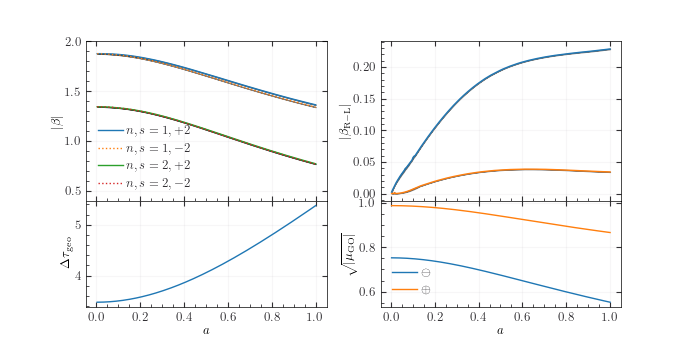

<IPython.core.display.Javascript object>

In [8]:
def flipind(n):
    if n == 1:
        return 0
    else:
        return 1

GSHEWaveform.setmplstyle("../plot_style.txt")
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(3.45*2, 3.45*1.0), gridspec_kw={'height_ratios': [1.5, 1]})
fig.subplots_adjust(hspace=0, wspace=0.225)


# Geodesic to GSHE
for n in range(2):
    for s in range(2):
        mu = betas[:, n, s, 0]
        std = betas[:, n, s, 1]
            
        label = r"$n, s = {},{}$".format(n + 1, polardict[s])
        axes[0, 0].plot(bhspin, mu, label=label, ls=polarls[s])
        axes[0, 0].fill_between(bhspin, mu - std, mu + std, alpha=0.5)


# GSHE to GSHE
for n in range(2):
    mu = betas[:, n, 2, 0]
    std = betas[:, n, 2, 1]
    
    mu = savgol_filter(mu, 3, 1)
    std = savgol_filter(std, 3, 1)
        
    label = r"$n = {}$".format(n+1)

    axes[0, 1].plot(bhspin, mu, label=label)
    axes[0, 1].fill_between(bhspin, mu - std, mu+std, alpha=0.5)
    
    
    
    
axes[1, 0].plot(bhspin, dmerger)
for i in range(2):
    mu = Xgeos[:, i, 8]
    if mu[0] > 0:
        label = r"$\oplus$"
    else:
        label = r"$\ominus$"
    axes[1, 1].plot(bhspin, np.abs(mu)**0.5, c=colors[i], label=label)
    

axes[0, 0].set_ylim(0.4, 2)
for i in range(2):
    axes[1, i].set_xlabel(r"$a$")
    axes[0, 0].legend(ncol=1)
axes[0, 0].set_ylabel(r"$|\beta|$")
axes[0, 1].set_ylabel(r"$|\beta_{\rm R-L}|$")
axes[1, 0].set_ylabel(r"$\Delta \tau_{\rm geo}$")
axes[1, 1].set_ylabel(r"$\sqrt{|\mu_{\rm GO}|}$")
axes[1, 1].legend()
    
for i in range(2):
    for j in range(2):
        axes[i, j].grid(alpha=0.1)

fig.savefig("/Users/richard/Downloads/bhspin_powerlaw.pdf", dpi=400, bbox_inches="tight") 
fig.show()


plt.figure()
for i in range(2):
    for s in range(2):
        plt.plot(bhspin, Xgshes[:, i, s,-1, 8] / Xgeos[:, i, 8],
                 label=r"$n, s = {}, {}$".format(i+1, polardict[s]))
plt.xlabel(r"$\phi_{\rm obs} / \pi$")
plt.ylabel(r"$\mu(\epsilon=0.1, s) / \mu_{\rm geo}$")
plt.legend()
plt.show()

# Dependence on geodesic direction

In [ ]:
runID = "11"


with open("../data/run_{}/Description.txt".format(runID)) as f:
    description = f.read()
# print(description)


Xgeo = np.load("../data/run_{}/Xgeos.npy".format(runID))
Xgshe = np.load("../data/run_{}/Xgshes.npy".format(runID))
epsilons = np.load("../data/run_{}/Epsilons.npy".format(runID))
alphas = np.load("../data/run_{}/alphas.npy".format(runID))
betas = np.load("../data/run_{}/betas.npy".format(runID))
xs = np.load("../data/run_{}/dir1.npy".format(runID))
ys = np.load("../data/run_{}/dir2.npy".format(runID))


X, Y = np.meshgrid(xs, ys)

N = 500
high_xs = high_ys = np.linspace(-1, 1, N)

highX, highY = np.meshgrid(high_xs, high_ys)

In [ ]:
dalpha = 5

ind = np.where((np.abs(alphas[:, 0] - 2) > dalpha))[0]
print(ind)

alphas[ind, ...] = np.nan
betas[ind, ...] = np.nan

## A histogram of $\alpha$ and $\beta$

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4))


x = alphas[:, 0]
x = x[~np.isnan(x)]
print(np.median(x), np.mean(x), np.std(x))
axes[0].hist(x, bins="auto", histtype="step")

x = betas[:, 0]
x = x[~np.isnan(x)]
print(np.median(x), np.mean(x), np.std(x))
axes[1].hist(np.log10(x), bins="auto", histtype="step")

axes[0].set_xlabel(r"$\alpha$")
axes[1].set_xlabel(r"$\log \beta$")
axes[0].legend(loc=2)
for i in range(2):
    axes[i].set_ylabel("Counts")
    
# plt.savefig("/Users/richard/Downloads/betas_count.png")
fig.show()

In [ ]:
k = np.nanargmax(alphas[:, 0])

print(alphas[k, :])
dt = np.abs(Xgeo[k, 2] - Xgshe[k, :, 2])

plt.figure()
plt.scatter(epsilons, dt)
plt.xlabel("eps")
plt.ylabel("dt")
plt.yscale("log")
plt.xscale("log")
plt.savefig("/Users/richard/Downloads/timing2.png")
plt.show()

In [ ]:
m = (~np.isnan(alphas[:, 0])) & (betas[:, 0] < 100)

In [ ]:
plt.figure()
# plt.hexbin(np.log10(alphas[m, 0]), np.log10(alphas[m, 1]), mincnt=1, gridsize=30, bins="log")
plt.scatter(alphas[m, 0], np.log10(betas[m, 0]))
# plt.colorbar()
# t = np.linspace(-3, 1, 100)
# plt.plot(t,t, c="red", ls='--')

plt.xlabel("Mean of alpha")
plt.ylabel("Log of mean of beta")
# plt.savefig("/Users/richard/Downloads/alpha_vs_beta.png")
plt.show()

In [ ]:
from healpy.rotator import angdist

In [ ]:
dsigma = [angdist(Xgshe[i, -1, 0:2], Xgeo[i, 0:2]) for i in range(Xgeo.shape[0])]

In [ ]:
highZ = griddata(np.vstack([X.reshape(-1, ), Y.reshape(-1,)]).T, dsigma,
                 np.vstack([highX.reshape(-1, ), highY.reshape(-1,)]).T, method="linear"
                ).reshape(highX.shape)


# custom_mplstyle()

fig, ax = plt.subplots()
cm = ax.pcolormesh(highX, highY, np.log10(highZ), shading="auto", cmap="nipy_spectral", rasterized=True)
fig.colorbar(cm, ax=ax, label=r"$\log \Delta \sigma$")
ax.set_xlabel("$k_x$")
ax.set_ylabel("$k_y$")

plt.savefig("/Users/richard/Downloads/dsigma.png", dpi=450, bbox_inches="tight")
fig.show()

In [ ]:
dt

In [ ]:
dt = np.abs(Xgeo[1502, 2] - Xgshe[1502, :, 2])

plt.figure()
plt.scatter(epsilons, dt)
plt.yscale("log")
plt.xscale("log")
plt.show()

In [ ]:
x[np.argmax(x), 0]

In [ ]:
s = 0
N = Xgeo.shape[0]


max_eps = np.full(N, np.nan)
for k in range(N):
    dt = np.abs(Xgshe[k, s, :, 2] - Xgeo[k, 2])

    if np.all(np.isnan(dt)):
        continue
    
    max_eps[k] = epsilons[np.nanargmax(dt)]

In [ ]:
m = ~np.isnan(max_eps)

In [ ]:
plt.figure()

plt.scatter(max_eps[m], betas[:, s, 0][m])
plt.xscale("log")

plt.xlabel(r"Maximum $\epsilon$")
plt.ylabel(r"$\beta$")
plt.axvline(1e-3, c="orange", ls="--")
# plt.yscale("log")
# plt.savefig("/Users/richard/Downloads/max_betas.png", dpi=300)
plt.show()

In [ ]:
x = betas[:, 0, 0]
x[np.isnan(x)] = - np.infty
xstd = betas[:, 0, 1]
y = alphas[:, 0, 0]

In [ ]:
ks = np.argsort(x)[::-1]
ks

In [ ]:
s = 0
plt.figure()

for i, k in enumerate(ks[1000:1020]):

    dt = np.abs(Xgeo[k, 2] - Xgshe[k, s, :, 2])
    plt.plot(epsilons, dt, label=r"$\beta = {:.2f} \pm {:.2f}, \alpha = {:.2f}$".format(x[k], xstd[k], y[k]))

plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\Delta t$")
plt.savefig("/Users/richard/Downloads/dts2.png", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
Xgeo[k, :]